# DAP Project  : TMDB 5000 Movie Dataset

## Problematic

Producing a movie costs a lot of money and is a risky investment with possibly high reward. Therefore predicting if a movie wil be a box office success is an important question for the film industry. 
On the other hand, for the film enthusiasts the quality of the movie is the most important, so the objective is also to predict if a movie will be highly rated.

## Load the data

The dataset was generated from The Movie Database API.

In [3]:
import json
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the movies

In [4]:
movie_path = "tmdb_5000_movies.csv"

In [5]:
movie_df = pd.read_csv("tmdb_5000_movies.csv")
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
movie_df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [12]:
movie_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [16]:
movie_df.shape

(4803, 20)

                budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.089377    0.505414  0.730823  0.269851   
id           -0.089377  1.000000    0.031202 -0.050425 -0.153536   
popularity    0.505414  0.031202    1.000000  0.644724  0.225502   
revenue       0.730823 -0.050425    0.644724  1.000000  0.251093   
runtime       0.269851 -0.153536    0.225502  0.251093  1.000000   
vote_average  0.093146 -0.270595    0.273952  0.197150  0.375046   
vote_count    0.593180 -0.004128    0.778130  0.781487  0.271944   

              vote_average  vote_count  
budget            0.093146    0.593180  
id               -0.270595   -0.004128  
popularity        0.273952    0.778130  
revenue           0.197150    0.781487  
runtime           0.375046    0.271944  
vote_average      1.000000    0.312997  
vote_count        0.312997    1.000000  


<Axes: >

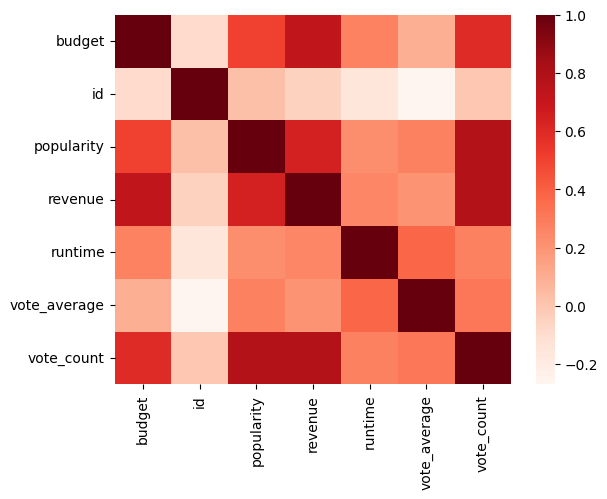

In [15]:
import pandas as pd

# Filtering the dataset in numerical values to perfrom correlation.
df = pd.read_csv("tmdb_5000_movies.csv") 

numerical_df = df.select_dtypes(include=["number"])

correlation_matrix = numerical_df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, cmap="Reds",
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns,
        square=False)

### Null values

In [ ]:
movie_df.apply(lambda x: sum(x.isna()),axis=0)

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

We are not interested in the features homepage and tagline so we will drop them later

#### Runtime null values

In [ ]:
movie_df.loc[movie_df.runtime.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


We set them to the mean runtime

In [ ]:
movie_df.runtime.fillna(movie_df.runtime.mean(),inplace=True)

Release date null value

In [ ]:
movie_df.loc[movie_df.release_date.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


Data is useless so we drop it

In [ ]:
movie_df= movie_df.loc[movie_df.release_date.notnull()]

#### Overview null values

We don't really use the overview feature, but we can easily fix the null values

In [ ]:
movie_df.overview.fillna("Unsepecified",inplace=True)

### Zero values

In [ ]:
movie_df.apply(lambda x: sum(x==0),axis=0)

budget                  1036
genres                     0
homepage                   0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1426
runtime                   34
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average              62
vote_count                61
dtype: int64

#### Revenue and budget

Since our primary objective is predicting revenue, we will drop the zero valued revenues and budgets

In [ ]:
outlier_thresh=1000
movie_df=movie_df[movie_df.budget>outlier_thresh]
movie_df=movie_df[movie_df.revenue>outlier_thresh]
len(movie_df)

3211

In [ ]:
zero_vals=movie_df.apply(lambda x: sum(x==0),axis=0)
zero_vals[zero_vals>0]

vote_average    2
vote_count      2
dtype: int64

#### Vote count and average

In [ ]:
movie_df=movie_df[movie_df.vote_count>0]

In [ ]:
zero_vals=movie_df.apply(lambda x: sum(x==0),axis=0)
zero_vals[zero_vals>0]

Series([], dtype: int64)

No more zero values

### JSON Handling

We still have some columns in json format 

In [ ]:
columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']

for col in columns: 
    movie_df[col] = movie_df[col].apply(json.loads)

movie_df['release_date'] =  pd.to_datetime(movie_df['release_date'], format ='%Y-%m-%d')

In [ ]:
movie_df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

A movie can have several genres.

In [ ]:
movie_df['keywords'][0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [ ]:
# We extract the names from the json data
for col in columns: 
    movie_df[col] = movie_df[col].map(lambda x:[i['name'] for i in x])

movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124


We extract year, month and day of year from release date

In [ ]:
movie_df['year'] = movie_df['release_date'].map(lambda dates: dates.year)

In [ ]:
movie_df['release_date'] = movie_df['release_date'].map(lambda dates: datetime.datetime.strptime(str(dates), '%Y-%m-%d %H:%M:%S'))
movie_df['day_of_year'] = movie_df['release_date'].map(lambda dates: dates.timetuple().tm_yday)

movie_df['year'] = movie_df['release_date'].map(lambda dates: dates.year)

In [ ]:
movie_df['month'] = movie_df['release_date'].map(lambda dates: dates.month)

## Load the credits 

In [7]:
credits_path = "tmdb_5000_credits.csv"

In [8]:
credits_df = pd.read_csv(credits_path)
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits_df.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

What the data looks like: (Example from Avatar)

In [9]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [10]:
credits_df.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [12]:
movie_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Length: 4803, dtype: bool

In [11]:
credits_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Length: 4803, dtype: bool

In [ ]:
credits_df['cast'][0][:700]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, '

In [ ]:
credits_df['crew'][0][:700]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "M'

### Null values

In [ ]:
credits_df.apply(lambda x: sum(x.isna()),axis=0)

movie_id    0
title       0
cast        0
crew        0
dtype: int64

### JSON Handling
We extract from the cast each actor's name and gender and we extract from the crew each crew member's name, job, department and gender

In [ ]:
columns = ['cast', 'crew']

for col in columns: 
    credits_df[col] = credits_df[col].apply(json.loads)
    
credits_df['cast'] = credits_df['cast'].map(lambda x:[ [i['name'],i['gender']] for i in x])
credits_df['crew'] = credits_df['crew'].map(lambda x:[ [i['name'],i['job'],i['department'],i['gender']] for i in x])

In [ ]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric..."
1,285,Pirates of the Caribbean: At World's End,"[[Johnny Depp, 2], [Orlando Bloom, 2], [Keira ...","[[Dariusz Wolski, Director of Photography, Cam..."
2,206647,Spectre,"[[Daniel Craig, 2], [Christoph Waltz, 2], [Léa...","[[Thomas Newman, Original Music Composer, Soun..."
3,49026,The Dark Knight Rises,"[[Christian Bale, 2], [Michael Caine, 2], [Gar...","[[Hans Zimmer, Original Music Composer, Sound,..."
4,49529,John Carter,"[[Taylor Kitsch, 2], [Lynn Collins, 1], [Saman...","[[Andrew Stanton, Screenplay, Writing, 2], [An..."


In [ ]:
credits_df.cast[0][:5]

[['Sam Worthington', 2],
 ['Zoe Saldana', 1],
 ['Sigourney Weaver', 1],
 ['Stephen Lang', 2],
 ['Michelle Rodriguez', 1]]

In [ ]:
credits_df.crew[0][:5]

[['Stephen E. Rivkin', 'Editor', 'Editing', 0],
 ['Rick Carter', 'Production Design', 'Art', 2],
 ['Christopher Boyes', 'Sound Designer', 'Sound', 0],
 ['Christopher Boyes', 'Supervising Sound Editor', 'Sound', 0],
 ['Mali Finn', 'Casting', 'Production', 1]]

According to TMDB, 0 corresponds to 'not set', 1 to 'Female' and 2 to 'Male'.

## EDA 

### Movie title

In [ ]:
count_title = movie_df.groupby('title').title.count()
count_title[count_title != 1]

title
The Host    2
Name: title, dtype: int64

Some movies have the same title, so we make the title unique by appending the release year

In [ ]:
double_title = count_title[count_title != 1].index.values

In [ ]:
movie_df.title = movie_df.apply(lambda row: row.title+'_'+str(row.release_date) if (row.title in double_title) else row.title,axis = 1)

In [ ]:
count_title = movie_df.groupby('title').title.count()
count_title[count_title != 1]

Series([], Name: title, dtype: int64)

### Movies budget

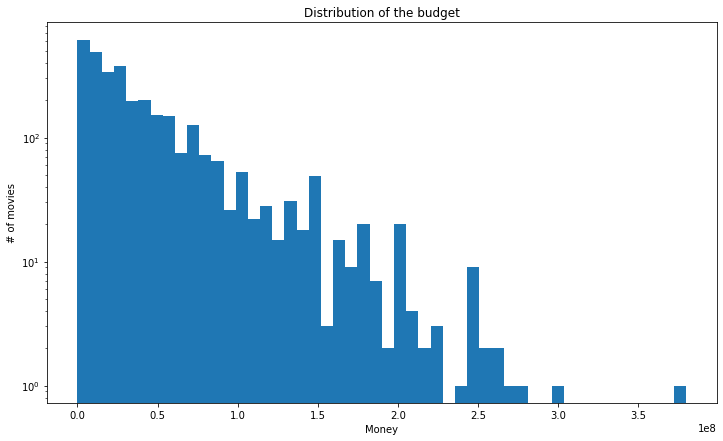

In [ ]:
plt.figure(figsize=(12,7))
plt.hist(movie_df['budget'],bins= 50)
plt.title("Distribution of the budget")
plt.xlabel('Money')
plt.ylabel('# of movies')
plt.yscale("log")
plt.show()

### Revenue

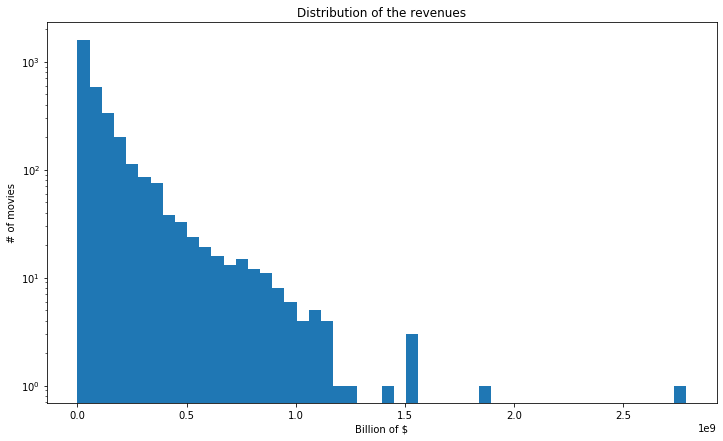

In [ ]:
plt.figure(figsize=(12,7))
plt.hist(movie_df['revenue'], bins= 50)
plt.title("Distribution of the revenues")
plt.xlabel('Billion of $')
plt.ylabel('# of movies')
plt.yscale("log")
plt.show()

### Genres

In [ ]:
df_genres = movie_df.explode('genres')
df_genres.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,day_of_year,month
0,237000000,Action,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,344,12
0,237000000,Adventure,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,344,12
0,237000000,Fantasy,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,344,12
0,237000000,Science Fiction,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,344,12
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,139,5


In [ ]:
df_genres.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', nan], dtype=object)

In [ ]:
count_genres = df_genres.groupby('genres').count()[['id']].sort_values(by='id', ascending=False)
count_genres.head()

,id
genres,
Drama,1428
Comedy,1101
Thriller,930
Action,915
Adventure,660


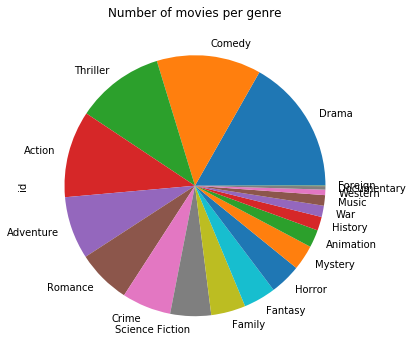

In [ ]:
count_genres.plot(kind ='pie',figsize=(10,6),legend = False, subplots = True)
plt.title('Number of movies per genre')
plt.show()

What genre make the most money ?

In [ ]:
df_genres_revenue = movie_df[['genres','revenue']].explode('genres')
df_genres_revenue.head()

,genres,revenue
0,Action,2787965087
0,Adventure,2787965087
0,Fantasy,2787965087
0,Science Fiction,2787965087
1,Adventure,961000000


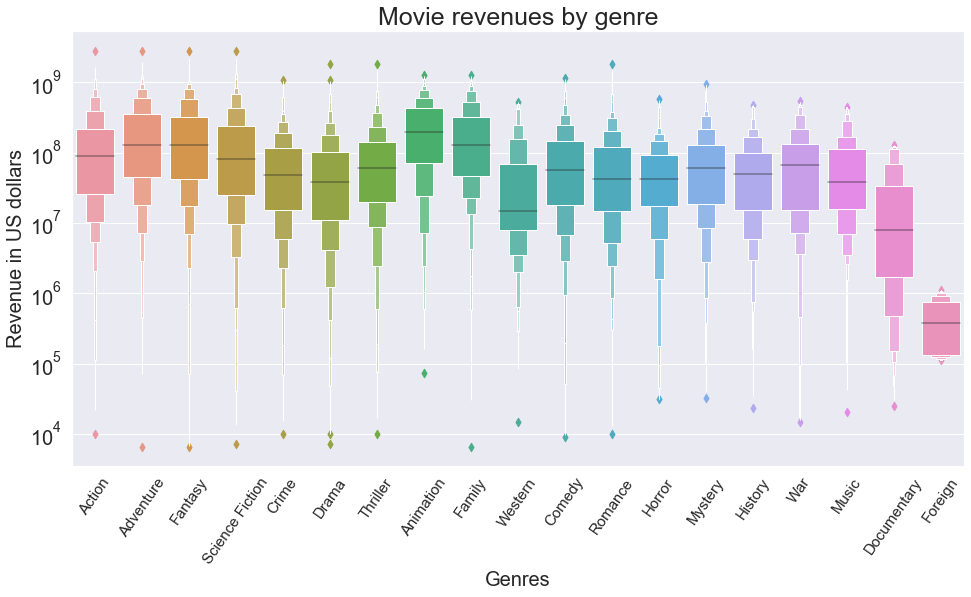

In [ ]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(16, 8))
sns.boxenplot(data=df_genres_revenue[df_genres_revenue["revenue"]>0].reset_index(),x="genres",y="revenue")
plt.yticks(fontsize=20)
plt.yscale("log")
plt.xticks(rotation=55,fontsize=15)
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Revenue in US dollars",fontsize=20)
plt.title("Movie revenues by genre",fontsize=25)
plt.show()

In [ ]:
df_genres_revenue = df_genres_revenue.groupby('genres')[['revenue']].sum()
df_genres_revenue.head()

,revenue
genres,
Action,162316088206
Adventure,163667924225
Animation,52436463168
Comedy,120403594524
Crime,45797218000


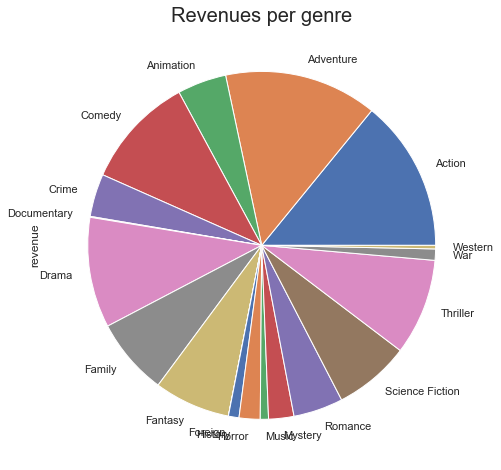

In [ ]:

df_genres_revenue.plot(kind ='pie',figsize=(16,8),legend = False, subplots = True)
plt.title('Revenues per genre',fontsize=20)
plt.show()

In [ ]:
df_genres_grade = movie_df[['genres','vote_average']].explode('genres')
df_genres_grade.head()

,genres,vote_average
0,Action,7.2
0,Adventure,7.2
0,Fantasy,7.2
0,Science Fiction,7.2
1,Adventure,6.9


In [ ]:
df_genres_grade.shape

(8509, 2)

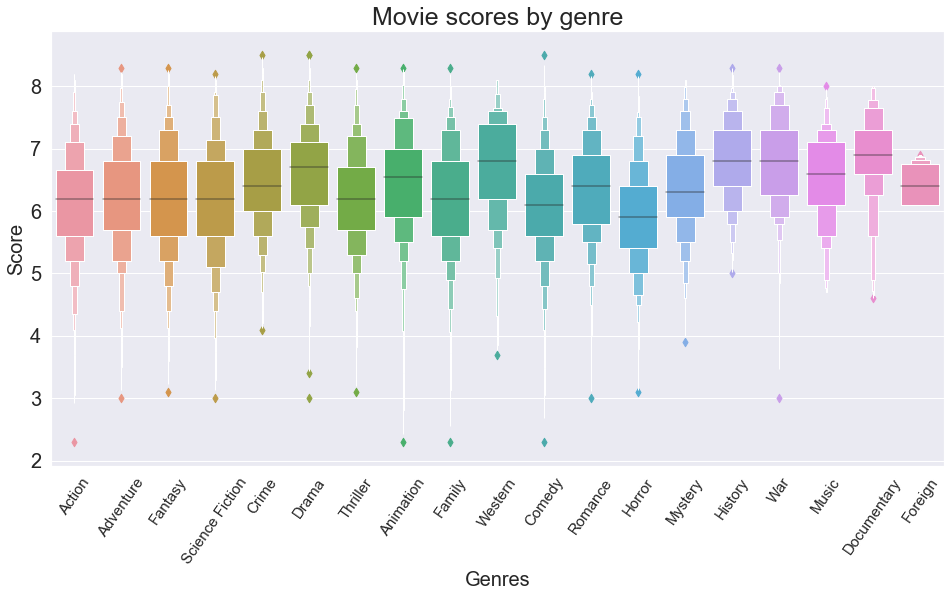

In [ ]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(16, 8))
sns.boxenplot(data=df_genres_grade,x="genres",y="vote_average")
plt.yticks(fontsize=20)
plt.xticks(rotation=55,fontsize=15)
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Score",fontsize=20)
plt.title("Movie scores by genre",fontsize=25)
plt.show()

### Popularity 

Metric computed by TMDB and taking into account : 

* Number of votes for the day
* Number of views for the day
* Number of users who marked it as a "favourite" for the day
* Number of users who added it to their "watchlist" for the day
* Release date
* Number of total votes
* Previous days score

In [ ]:
df_movie_pop = movie_df[['title','popularity']].sort_values(by='popularity', ascending=False)
df_movie_pop.head()

,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564


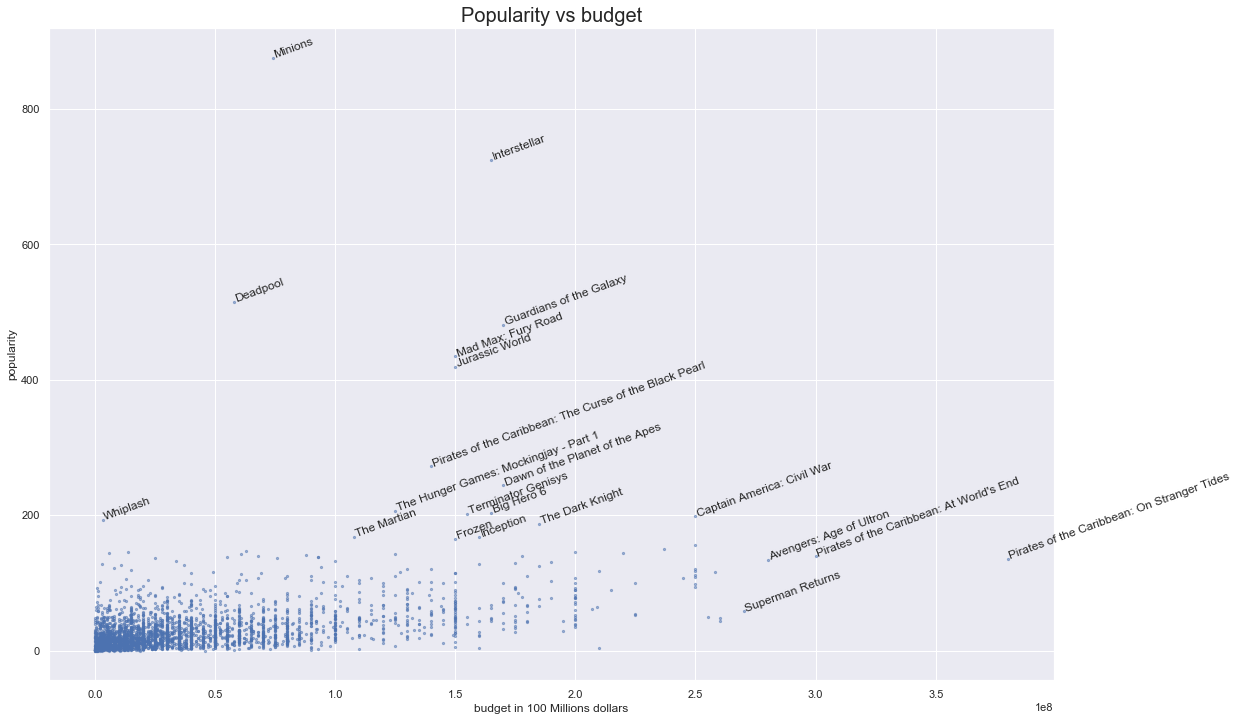

In [ ]:
x=movie_df["budget"]
y=movie_df["popularity"]
fig,ax=plt.subplots(figsize=(18,12))
plt.scatter(x,y,alpha=0.5,s=5)
plt.title("Popularity vs budget",fontsize=20)
plt.xlabel("budget in 100 Millions dollars")
plt.ylabel("popularity")
for index , row in movie_df.iterrows():
    x=row["budget"]
    y=row["popularity"]
    if((500000000>x>260000000) | (y>160)):
        plt.annotate(s=row["title"],xy=(x,y),rotation=20)

### Revenue Timeline

In [ ]:
df_movie_revenue = movie_df[['title','revenue','release_date']].set_index('release_date').sort_values(by='revenue', ascending=False)
df_movie_revenue.head()

,title,revenue
release_date,,
2009-12-10,Avatar,2787965087
1997-11-18,Titanic,1845034188
2012-04-25,The Avengers,1519557910
2015-06-09,Jurassic World,1513528810
2015-04-01,Furious 7,1506249360


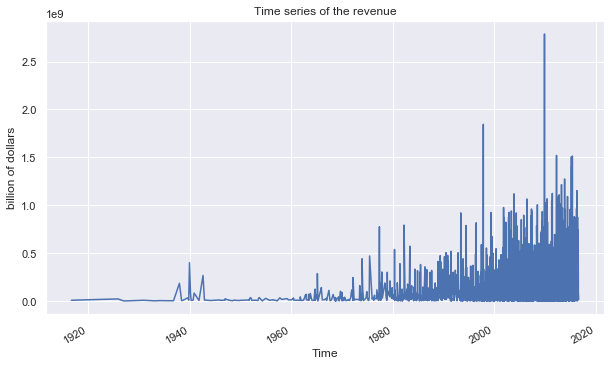

In [ ]:
df_movie_revenue.plot(figsize=(10,6),legend = False)
plt.title('Time series of the revenue')
plt.xlabel("Time")
plt.ylabel("billion of dollars")
plt.show()

In [ ]:
df_genres_revenue_year = movie_df[['genres','revenue','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.head()

revenue
genres year          
Action 1930   8000000
       1936   2736000
       1949   7800000
       1950   8000000
       1952  36000000

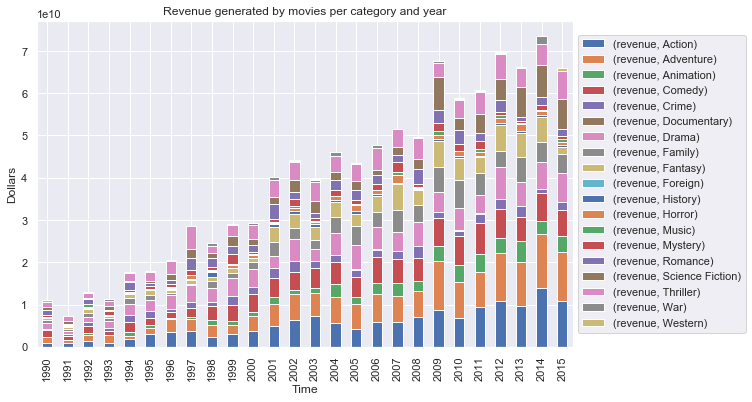

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)

starting_year = 1990
df_genres_revenue_year = movie_df[['genres','revenue','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.unstack(level=0).fillna(0).loc[starting_year:2015].plot(kind = 'bar',stacked=True, ax=ax, figsize=(12,6),legend  = True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Revenue generated by movies per category and year')
plt.ylabel('Dollars')
plt.xlabel('Time')
plt.show()

#### Adjusting to inflation

In [ ]:
movie_df.year.describe()

count    3209.000000
mean     2001.722032
std        13.198112
min      1916.000000
25%      1998.000000
50%      2005.000000
75%      2010.000000
max      2016.000000
Name: year, dtype: float64

In [ ]:
movie_df["budget_adjusted"]=movie_df.apply(lambda x: cpi.inflate(x["budget"],x["year"],to=2016),axis=1)
movie_df["revenue_adjusted"]=movie_df.apply(lambda x: cpi.inflate(x["revenue"],x["year"],to=2016),axis=1)

In [ ]:
df_movie_revenue_adjusted = movie_df[['title','revenue_adjusted','release_date']].set_index('release_date').sort_values(by='revenue_adjusted', ascending=False)
df_movie_revenue_adjusted.head()

,title,revenue_adjusted
release_date,,
1939-12-15,Gone with the Wind,6.909723e+09
1942-08-14,Bambi,3.937987e+09
2009-12-10,Avatar,3.118954e+09
1937-12-20,Snow White and the Seven Dwarfs,3.082181e+09
1977-05-25,Star Wars,3.070973e+09


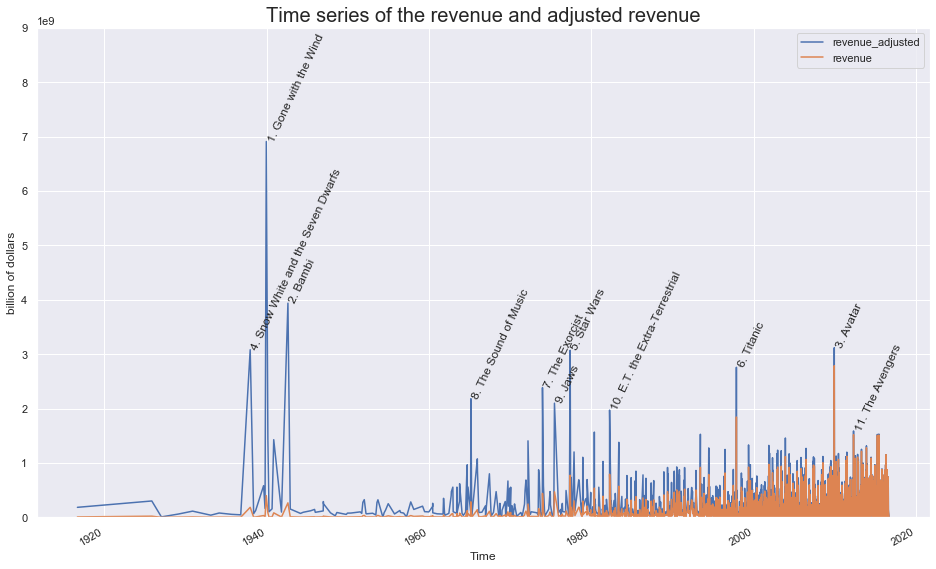

In [ ]:
#plt.plot(df_movie_revenue.index,df_movie_revenue["revenue"])
#plt.plot(df_movie_revenue.index,df_movie_revenue_adjusted["revenue_adjusted"])
df_movie_revenue_adjusted.reset_index(
    ).merge(df_movie_revenue,how="inner").set_index("release_date").sort_index().drop(columns=["title"]).plot(figsize=(16,10))
plt.title('Time series of the revenue and adjusted revenue',fontsize=20)
plt.xlabel("Time")
plt.ylabel("billion of dollars")
plt.ylim(0,9e9)
i=0
for index , row in df_movie_revenue_adjusted[:11].iterrows():
    i+=1
    y=row["revenue_adjusted"]
    plt.annotate(s=str(i)+". "+row["title"],xy=(index,y),rotation=65,xytext=(index,y+10000000))
plt.show()

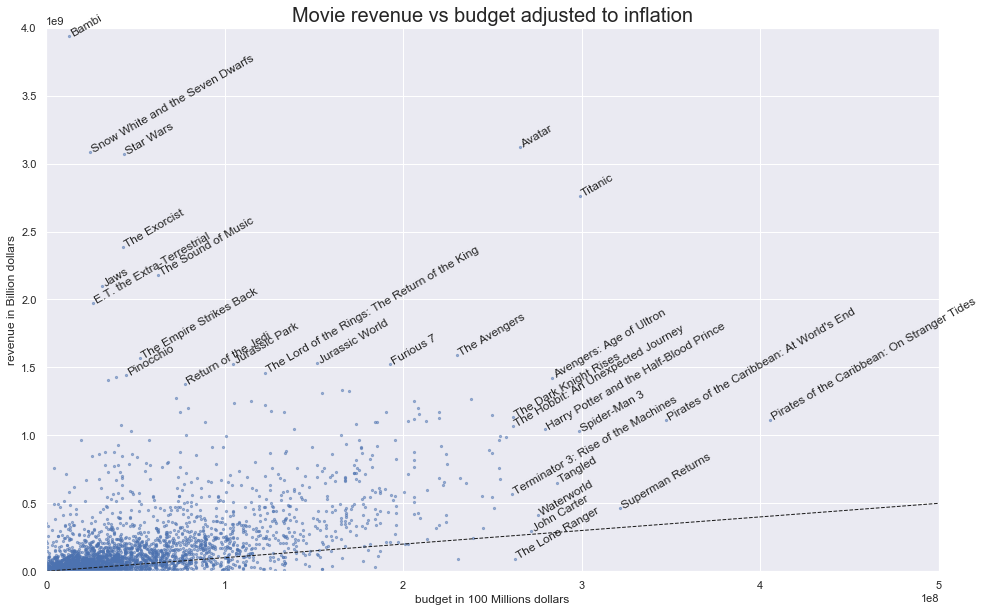

In [ ]:
pos_budg=movie_df[movie_df["budget_adjusted"]>0]
x=pos_budg["budget_adjusted"]
y=pos_budg["revenue_adjusted"]
fig,ax=plt.subplots(figsize=(16,10))
plt.scatter(x,y,alpha=0.5,s=5)
plt.xlim(0,500000000)
plt.ylim(0,4000000000)
plt.title("Movie revenue vs budget adjusted to inflation",fontsize=20)
plt.xlabel("budget in 100 Millions dollars")
plt.ylabel("revenue in Billion dollars")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
for index , row in pos_budg.iterrows():
    x=row["budget_adjusted"]
    y=row["revenue_adjusted"]
    if((500000000>x>260000000) | (4000000000>y>1360000000)):
        title_to_annotate=row["title"]
        if((row["title"]!="The Godfather")&(row["title"]!="Fantasia")):
            plt.annotate(s=row["title"],xy=(x,y),rotation=30)

**Movies below the line recorded a loss**

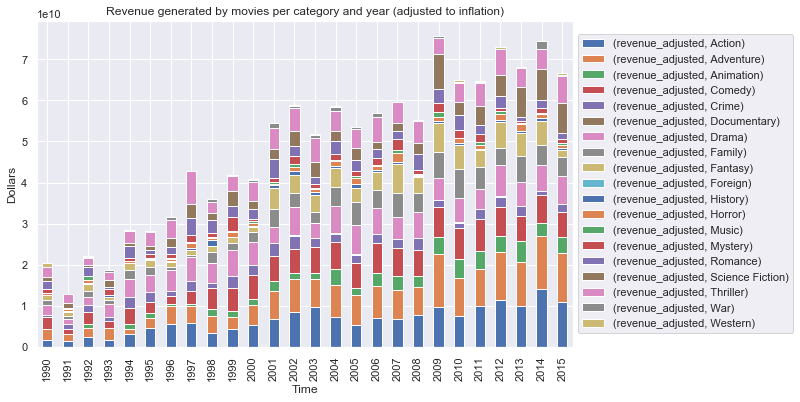

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)

starting_year = 1990
df_genres_revenue_year = movie_df[['genres','revenue_adjusted','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.unstack(level=0).fillna(0).loc[starting_year:2015].plot(kind = 'bar',stacked=True, ax=ax, figsize=(12,6),legend  = True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Revenue generated by movies per category and year (adjusted to inflation)')
plt.ylabel('Dollars')
plt.xlabel('Time')
plt.show()

#### Revenue and vote average

What is the relation between revenue and the vote_average ?

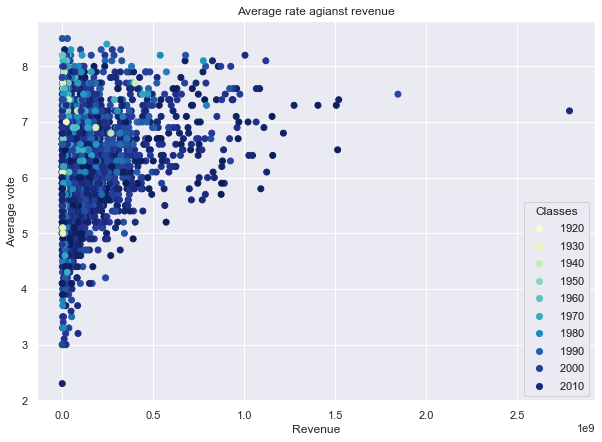

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
scatter = ax.scatter( movie_df['revenue'],movie_df['vote_average'], c =movie_df['year'],cmap='YlGnBu', marker  ='o')


legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.title('Average rate agianst revenue')
plt.xlabel('Revenue')
plt.ylabel('Average vote')
plt.show()

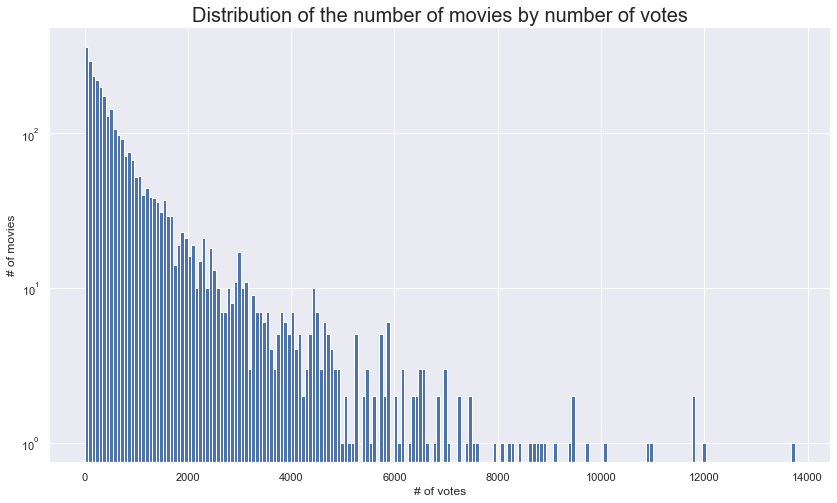

In [ ]:
plt.figure(figsize=(14,8))
plt.hist(movie_df['vote_count'],200)
plt.title('Distribution of the number of movies by number of votes',fontsize=20)
plt.xlabel('# of votes')
plt.ylabel('# of movies')
plt.yscale("log")
plt.show()

### Production companies

In [ ]:
df_movie_prod = movie_df[['production_companies','id']].explode('production_companies')
df_movie_prod = df_movie_prod.groupby('production_companies').count().sort_values(by='id', ascending=False)
df_movie_prod.columns=["count"]
df_movie_prod

,count
production_companies,
Warner Bros.,280
Universal Pictures,272
Paramount Pictures,242
Twentieth Century Fox Film Corporation,201
Columbia Pictures,167
...,...
Hit & Run Productions,1
Hobby Films,1
Hokkaido Broadcasting Co.,1


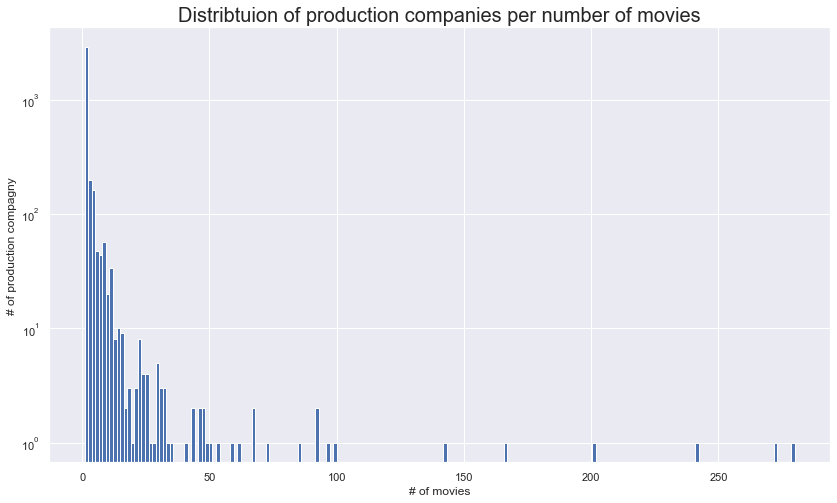

In [ ]:

plt.figure(figsize=(14,8))
plt.hist(df_movie_prod['count'],200)
plt.title('Distribtuion of production companies per number of movies',fontsize=20)
plt.ylabel('# of production compagny')
plt.xlabel('# of movies')
plt.yscale("log")
plt.show()

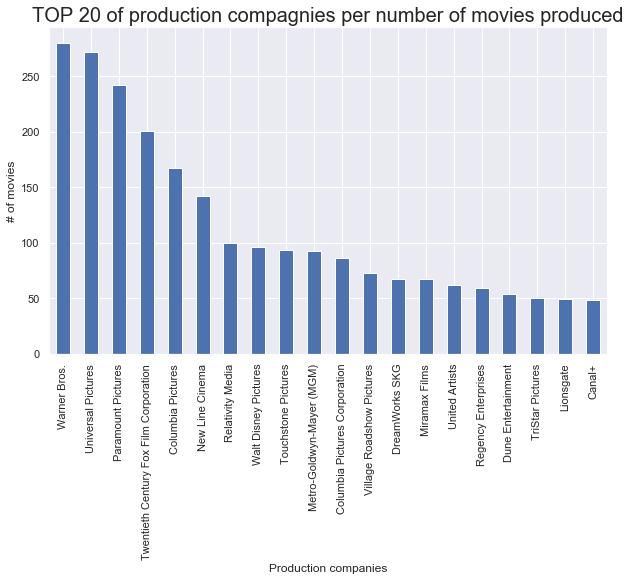

In [ ]:
df_movie_prod[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of production compagnies per number of movies produced',fontsize=20)
plt.xlabel("Production companies")
plt.ylabel("# of movies")
plt.show()

Let's look in terms of revenue.

In [ ]:
df_movie_revenue = movie_df[['production_companies','revenue']].explode('production_companies')

In [ ]:
df_movie_revenue_sum = df_movie_revenue.groupby('production_companies').sum().sort_values(by='revenue', ascending=False)
df_movie_revenue_sum.head()

,revenue
production_companies,
Warner Bros.,48822074563
Universal Pictures,42394603321
Paramount Pictures,40514725671
Twentieth Century Fox Film Corporation,39136501776
Columbia Pictures,28526534603


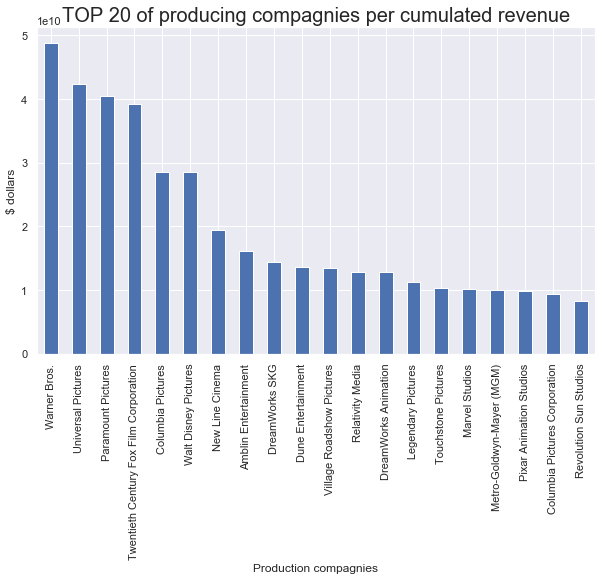

In [ ]:
df_movie_revenue_sum[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of producing compagnies per cumulated revenue',fontsize=20)
plt.xlabel("Production compagnies")
plt.ylabel("$ dollars")
plt.show()

In [ ]:
df_movie_revenue_avg = df_movie_revenue.groupby('production_companies').mean().sort_values(by='revenue', ascending=False)
df_movie_revenue_avg.head()

,revenue
production_companies,
Québec Production Services Tax Credit,1.506249e+09
Abu Dhabi Film Commission,1.506249e+09
"Colorado Office of Film, Television & Media",1.506249e+09
Prime Focus,1.405404e+09
Vita-Ray Dutch Productions (III),1.153304e+09


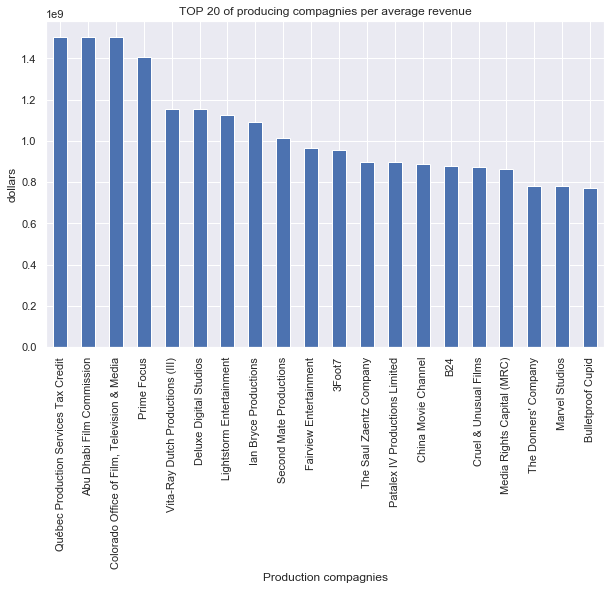

In [ ]:
df_movie_revenue_avg[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of producing compagnies per average revenue')
plt.xlabel("Production compagnies")
plt.ylabel("dollars")
plt.show()

For the model we would like to only keep the most important companies as it's a categorical features and we will have one new dimension per value.

In [ ]:
#we only keep the 20 top with the most movies, can try with df_movie_revenue_sum ?
interesting_prod = df_movie_prod.head(20).index.values
movie_df.production_companies = movie_df.production_companies.apply(lambda x :[prod for prod in x if prod in interesting_prod])
movie_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,year,day_of_year,month,budget_adjusted,revenue_adjusted
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Twentieth Century Fox Film Corporation, Dune ...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,344,12,2.651368e+08,3.118954e+09
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,[Walt Disney Pictures],...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,139,5,3.472625e+08,1.112398e+09
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,[Columbia Pictures],...,Released,A Plan No One Escapes,Spectre,6.3,4466,2015,299,10,2.480907e+08,8.917844e+08
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,[Warner Bros.],...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,198,7,2.613385e+08,1.134145e+09
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,67,3,2.717920e+08,2.970259e+08


### Actors 

In [ ]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric..."
1,285,Pirates of the Caribbean: At World's End,"[[Johnny Depp, 2], [Orlando Bloom, 2], [Keira ...","[[Dariusz Wolski, Director of Photography, Cam..."
2,206647,Spectre,"[[Daniel Craig, 2], [Christoph Waltz, 2], [Léa...","[[Thomas Newman, Original Music Composer, Soun..."
3,49026,The Dark Knight Rises,"[[Christian Bale, 2], [Michael Caine, 2], [Gar...","[[Hans Zimmer, Original Music Composer, Sound,..."
4,49529,John Carter,"[[Taylor Kitsch, 2], [Lynn Collins, 1], [Saman...","[[Andrew Stanton, Screenplay, Writing, 2], [An..."


In [ ]:
df_actors = credits_df.set_index('title').cast.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'cast'})
df_actors.head()

,title,cast
0,Avatar,"[Sam Worthington, 2]"
1,Avatar,"[Zoe Saldana, 1]"
2,Avatar,"[Sigourney Weaver, 1]"
3,Avatar,"[Stephen Lang, 2]"
4,Avatar,"[Michelle Rodriguez, 1]"


In [ ]:
df_actors['actor'] = df_actors['cast'].map(lambda x: x[0])
df_actors['actor_gender']  = df_actors['cast'].map(lambda x: x[1])
df_actors.drop(columns = 'cast',inplace = True)
df_actors.head()

,title,actor,actor_gender
0,Avatar,Sam Worthington,2
1,Avatar,Zoe Saldana,1
2,Avatar,Sigourney Weaver,1
3,Avatar,Stephen Lang,2
4,Avatar,Michelle Rodriguez,1


In [ ]:
df_actors.actor.nunique()

54201

In [ ]:
df_actor_movie = df_actors.merge(movie_df, on='title', how='left').dropna()
df_actor_movie.head()

,title,actor,actor_gender,budget,genres,homepage,id,keywords,original_language,original_title,...,spoken_languages,status,tagline,vote_average,vote_count,year,day_of_year,month,budget_adjusted,revenue_adjusted
0,Avatar,Sam Worthington,2,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,"[English, Español]",Released,Enter the World of Pandora.,7.2,11800.0,2009.0,344.0,12.0,2.651368e+08,3.118954e+09
1,Avatar,Zoe Saldana,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,"[English, Español]",Released,Enter the World of Pandora.,7.2,11800.0,2009.0,344.0,12.0,2.651368e+08,3.118954e+09
2,Avatar,Sigourney Weaver,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,"[English, Español]",Released,Enter the World of Pandora.,7.2,11800.0,2009.0,344.0,12.0,2.651368e+08,3.118954e+09
3,Avatar,Stephen Lang,2,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,"[English, Español]",Released,Enter the World of Pandora.,7.2,11800.0,2009.0,344.0,12.0,2.651368e+08,3.118954e+09
4,Avatar,Michelle Rodriguez,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,"[English, Español]",Released,Enter the World of Pandora.,7.2,11800.0,2009.0,344.0,12.0,2.651368e+08,3.118954e+09


Text(0, 0.5, 'Mean revenue in Billion dollars')

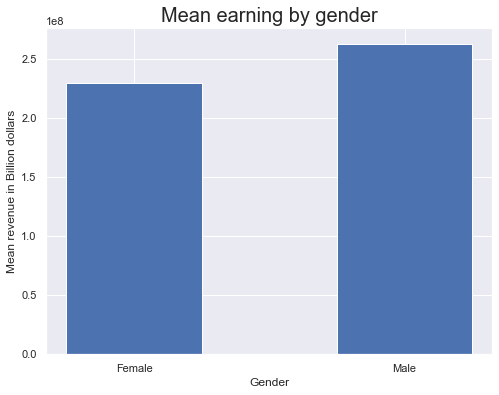

In [ ]:
gender_plot=df_actor_movie.groupby('actor_gender')[['revenue']].mean()[1:]
f,ax=plt.subplots(figsize=(8,6))
plt.bar(["Female","Male"],gender_plot["revenue"],width=0.5)
plt.title("Mean earning by gender",fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Mean revenue in Billion dollars")

In [ ]:
gender_plot

,revenue
actor_gender,
1,2.295606e+08
2,2.628484e+08


In [ ]:
"""
f,ax=plt.subplots(figsize=(8,6))
plt.bar(["Female","Male"],gender_plot["revenue"],width=0.5)
plt.title("Mean earning by gender",fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Mean revenue in Billion dollars")

"""
gender_plot=df_actor_movie.groupby(['actor_gender',"year"])[['revenue']].mean()
gender_plot.unstack(level=0).fillna(0)#.drop(columns=#.plot(kind = 'bar',stacked=True, figsize=(12,6),legend  = True)
#plt.show()

revenue                            
actor_gender             0             1             2
year                                                  
1937.0        1.849255e+08  1.849255e+08  1.849255e+08
1939.0        3.375497e+07  3.375497e+07  3.375497e+07
1940.0        8.332000e+07  0.000000e+00  8.332000e+07
1942.0        2.674472e+08  2.674472e+08  2.674472e+08
1962.0        5.960000e+07  5.960000e+07  5.960000e+07
1963.0        7.889876e+07  7.889876e+07  7.889876e+07
1964.0        8.394237e+07  1.061175e+08  8.266304e+07
1965.0        0.000000e+00  1.411957e+08  1.411957e+08
1966.0        6.000000e+06  0.000000e+00  6.000000e+06
1967.0        1.115848e+08  1.115848e+08  1.115848e+08
1969.0        8.197449e+07  8.197449e+07  8.197449e+07
1970.0        4.000000e+07  4.000000e+07  4.000000e+07
1971.0        4.400558e+07  1.160195e+08  9.361520e+07
1972.0        2.450664e+08  2.450664e+08  2.450664e+08
1973.0        3.015420e+08  3.481300e+08  2.922244e+08
1974.0        9.757200e+07  9.757200e+07  9.757200e+07
1975.0        2.711004e+08  2.637095e+08  3.063157e+08
1977.0        7.192114e+08  4.066734e+08  6.094719e+08
1978.0        1.165172e+08  1.055000e+08  1.154400e+08
1979.0        1.476165e+08  1.376245e+08  1.178747e+08
1980.0        4.493423e+08  1.563794e+08  4.013709e+08
1981.0        2.610155e+08  1.451146e+08  1.976007e+08
1982.0        5.385278e+08  3.180537e+08  9.026184e+07
1983.0        3.825669e+08  2.414255e+08  2.977633e+08
1984.0        2.768319e+08  1.147467e+08  2.198316e+08
1985.0        2.251980e+08  2.432205e+08  2.722498e+08
1986.0        1.100000e+07  1.100000e+07  1.100000e+07
1987.0        1.707770e+08  1.274082e+08  1.080927e+08
1988.0        8.187281e+06  1.079368e+07  1.098822e+07
1989.0        3.567475e+08  2.554880e+08  2.970196e+08
1990.0        1.374454e+08  1.663010e+08  1.792960e+08
1991.0        7.434726e+06  7.434726e+06  7.434726e+06
1992.0        1.909815e+08  3.079510e+08  2.575578e+08
1993.0        3.424594e+08  2.248870e+08  5.511368e+08
1994.0        2.626244e+08  3.558316e+08  3.823998e+08
1995.0        2.531791e+08  1.783503e+08  2.088363e+08
1996.0        1.911339e+08  1.165967e+08  1.551782e+08
1997.0        7.853158e+08  7.688350e+08  6.173689e+08
1998.0        8.029016e+07  1.592071e+08  9.493575e+07
1999.0        2.803258e+08  2.377576e+08  2.453274e+08
2000.0        1.118620e+08  1.105699e+08  1.307231e+08
2001.0        3.774534e+08  3.005035e+08  3.232307e+08
2002.0        2.763334e+08  2.728733e+08  2.990508e+08
2003.0        2.635343e+08  1.987132e+08  2.633589e+08
2004.0        2.429115e+08  2.030079e+08  2.325863e+08
2005.0        2.639256e+08  1.679993e+08  2.214672e+08
2006.0        2.068760e+08  1.364788e+08  1.935160e+08
2007.0        2.655684e+08  2.411973e+08  2.484655e+08
2008.0        2.814613e+08  1.741627e+08  2.074447e+08
2009.0        2.982783e+08  2.269196e+08  2.345395e+08
2010.0        1.785022e+08  1.811904e+08  1.888115e+08
2011.0        1.631113e+08  1.430320e+08  1.933340e+08
2012.0        3.265101e+08  2.575735e+08  3.680976e+08
2013.0        3.458771e+08  3.369184e+08  3.180494e+08
2014.0        3.101392e+08  3.006918e+08  3.826671e+08
2015.0        3.136056e+08  3.254035e+08  3.294777e+08
2016.0        3.231625e+08  2.886579e+08  3.303914e+08

In [ ]:
df_actor_movie_count = df_actor_movie.groupby('actor')[['id']].count().sort_values(by ='id',ascending = False)
df_actor_movie_count.columns=["count"]
df_actor_movie_count.head()

,count
actor,
Samuel L. Jackson,29
Matt Damon,26
Morgan Freeman,23
Bill Hader,23
Jonah Hill,22


In [ ]:
df_nb_actors = df_actors.groupby('title')[['actor']].count().sort_values(by='actor',ascending = False)
df_nb_actors.rename(columns={"actor": "# of actors"},inplace = True)
df_nb_actors.head(10)

,# of actors
title,
Rock of Ages,224
Mr. Smith Goes to Washington,213
Les Misérables,208
Jason Bourne,208
You Don't Mess with the Zohan,183
Real Steel,172
Star Trek,168
Oz: The Great and Powerful,159
The Dark Knight Rises,158


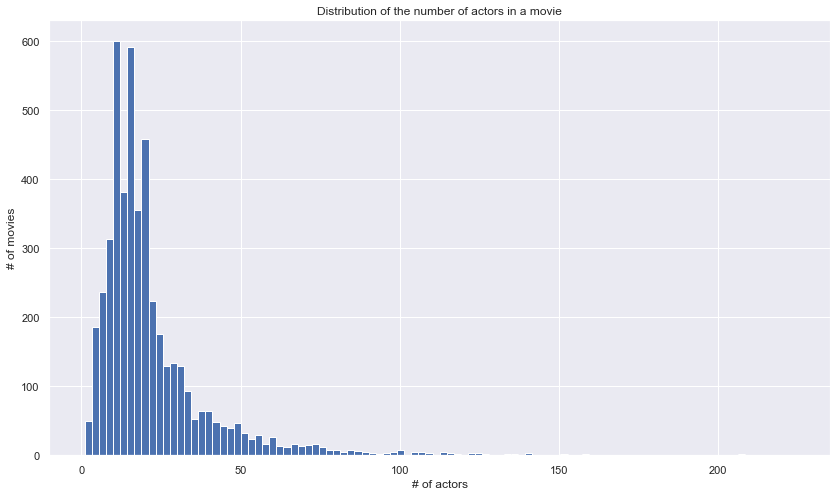

In [ ]:
plt.figure(figsize=(14,8))
plt.hist(df_nb_actors['# of actors'],100)
plt.title('Distribution of the number of actors in a movie')
plt.ylabel('# of movies')
plt.xlabel('# of actors')
plt.show()

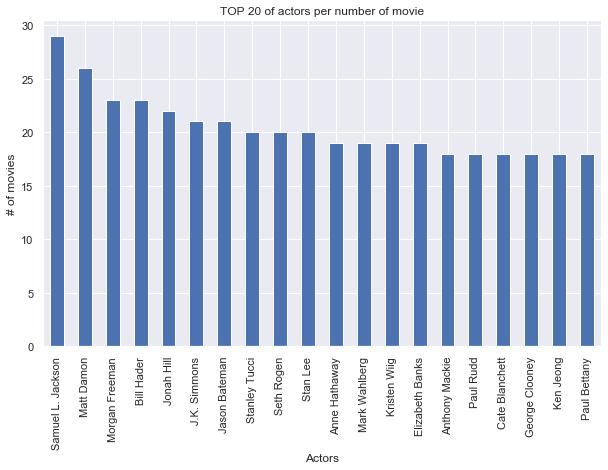

In [ ]:
df_actor_movie_count[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of actors per number of movie')
plt.ylabel("# of movies")
plt.xlabel("Actors")
plt.show()

In [ ]:
df_actor_revenue_sum = df_actor_movie.groupby('actor')[['revenue']].sum().sort_values(by ='revenue',ascending = False)
df_actor_revenue_sum.head()

,revenue
actor,
Stan Lee,1.590812e+10
Samuel L. Jackson,1.253272e+10
Frank Welker,9.815289e+09
Hugo Weaving,9.335319e+09
Cate Blanchett,8.923467e+09


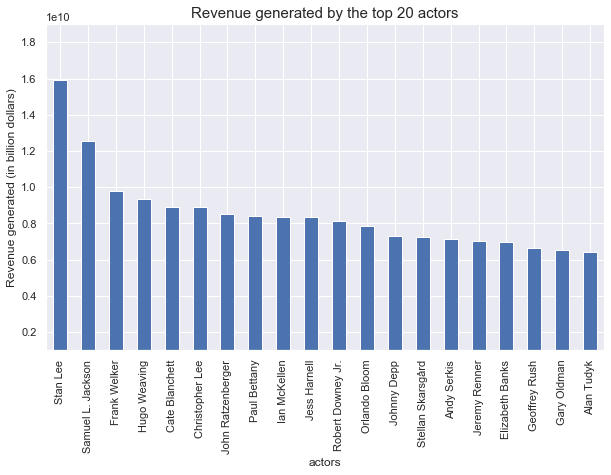

In [ ]:
df_actor_revenue_sum[:20].plot(kind ="bar",figsize=(10,6),legend = False)

plt.title('Revenue generated by the top 20 actors',fontsize=15)
plt.ylabel("Revenue generated (in billion dollars)")
plt.xlabel("actors")
plt.ylim(1e9,1e10+9e9)
plt.show()

In [ ]:
df_actor_vote = df_actor_movie.groupby('actor')[['vote_average']].mean().sort_values(by ='vote_average',ascending = False)
df_actor_vote.head()

,vote_average
actor,
John Marley,8.4
Gabriele Torrei,8.4
Joseph Medaglia,8.4
Richard S. Castellano,8.4
Max Brandt,8.4


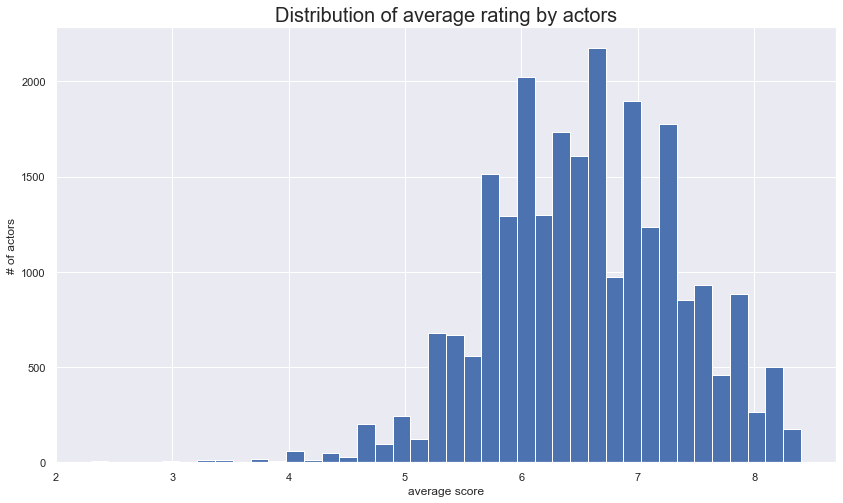

In [ ]:
plt.figure(figsize=(14,8))
plt.hist(df_actor_vote['vote_average'],40)
plt.title('Distribution of average rating by actors',fontsize=20)
plt.xlabel('average score')
plt.ylabel('# of actors')
plt.show()

In [ ]:
df_actor_movie['actor_gender'].value_counts()

2    16330
0    13083
1     8326
Name: actor_gender, dtype: int64

The industry is dominated by men.

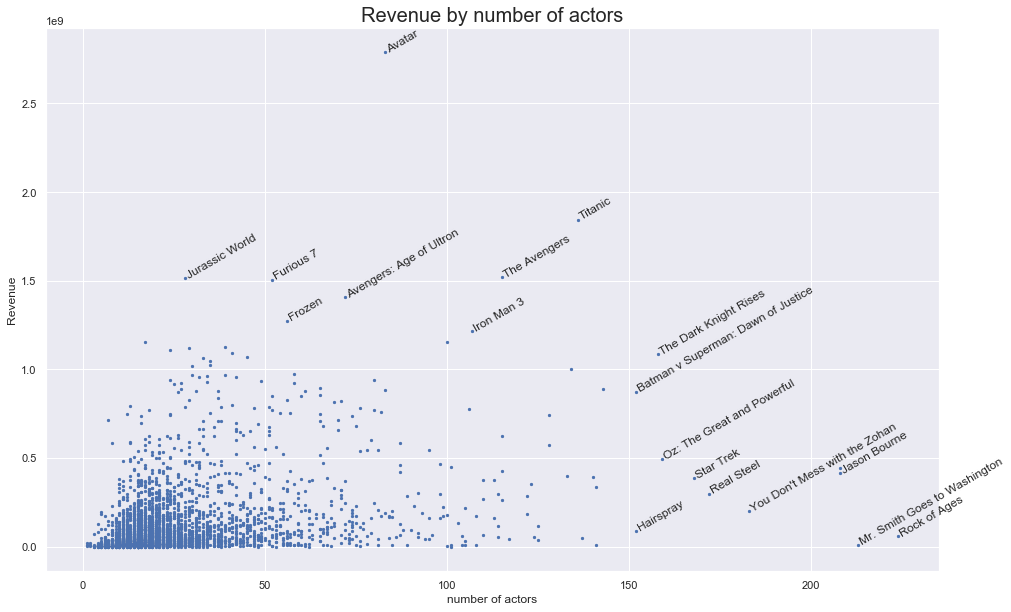

In [ ]:
revenue_number_of_actors=movie_df.join(df_nb_actors,on="title")[["revenue","# of actors","title"]]
fig ,ax =plt.subplots(figsize=(16,10))
plt.scatter(y=revenue_number_of_actors["revenue"],x=revenue_number_of_actors["# of actors"],alpha=1,s=5)
plt.title("Revenue by number of actors",fontsize=20)
plt.xlabel("number of actors")
plt.ylabel("Revenue")
for index , row in revenue_number_of_actors.iterrows():
    x=row["# of actors"]
    y=row["revenue"]
    if((x>150)|(y>1200000000)):
        title_to_annotate=row["title"]
        if (not title_to_annotate=="Les Misérables"):
            plt.annotate(s=row["title"],xy=(x,y),rotation=30)